In [96]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss, f1_score, roc_curve
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pycaret.classification as pc

warnings.filterwarnings('ignore')

In [97]:
bd = pd.read_parquet("../Data/Raw/dataset_kobe_dev.parquet")

In [98]:
bd.shape

(24271, 25)

In [99]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24271 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         24271 non-null  object 
 1   combined_shot_type  24271 non-null  object 
 2   game_event_id       24271 non-null  int64  
 3   game_id             24271 non-null  int64  
 4   lat                 24271 non-null  float64
 5   loc_x               24271 non-null  int64  
 6   loc_y               24271 non-null  int64  
 7   lon                 24271 non-null  float64
 8   minutes_remaining   24271 non-null  int64  
 9   period              24271 non-null  int64  
 10  playoffs            24271 non-null  int64  
 11  season              24271 non-null  object 
 12  seconds_remaining   24271 non-null  int64  
 13  shot_distance       24271 non-null  int64  
 14  shot_made_flag      20285 non-null  float64
 15  shot_type           24271 non-null  object 
 16  shot

In [100]:
bd.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        3986
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [101]:
cols = ['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance']
bd_filtrado = bd[bd['shot_made_flag'].notnull()]
bd_filtrado = bd_filtrado[bd_filtrado['shot_type'] == '2PT Field Goal']

#Deixa no dataframe somente as colunas importantes
bd_filtrado = bd_filtrado[cols]

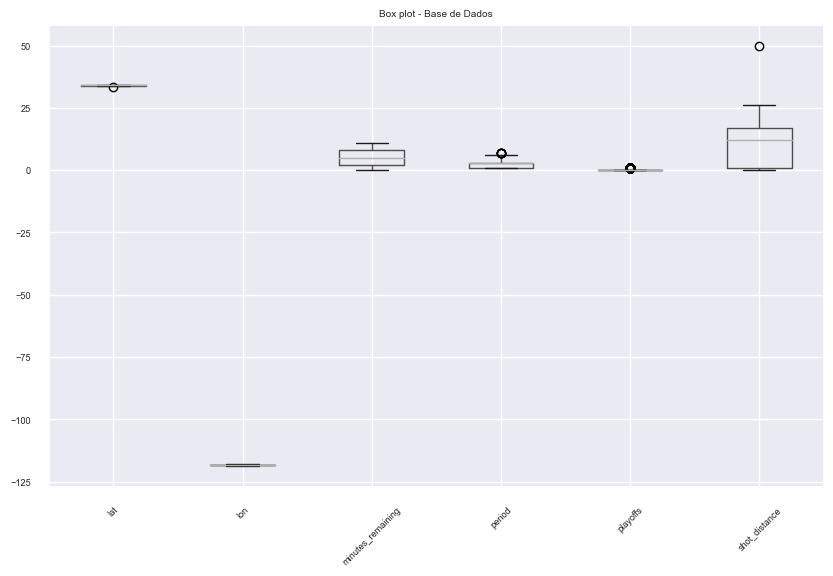

In [102]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
bd_filtrado.boxplot()
plt.title('Box plot - Base de Dados')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização, se necessário
plt.show()


<AxesSubplot: >

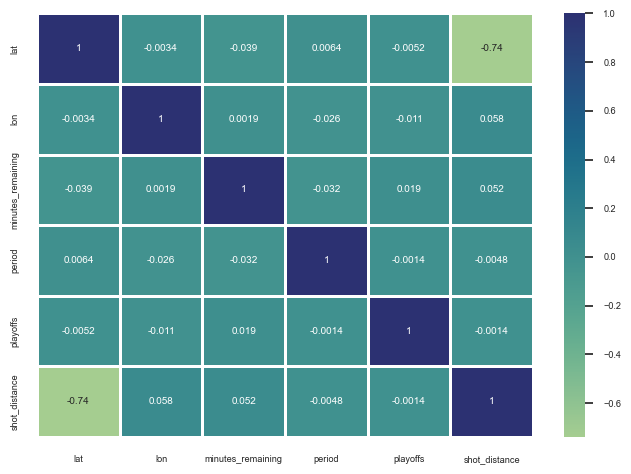

In [103]:
sns.heatmap(bd_filtrado.corr(), annot=True, linewidths=1, cmap='crest')

In [104]:
bd_filtrado2 = bd[bd['shot_made_flag'].notnull()]
bd_filtrado2 = bd_filtrado2[bd_filtrado2['shot_type'] == '2PT Field Goal']
bd_filtrado2 = bd_filtrado2[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance', 'shot_made_flag']]

#sns.pairplot(bd_filtrado2, hue='shot_made_flag')

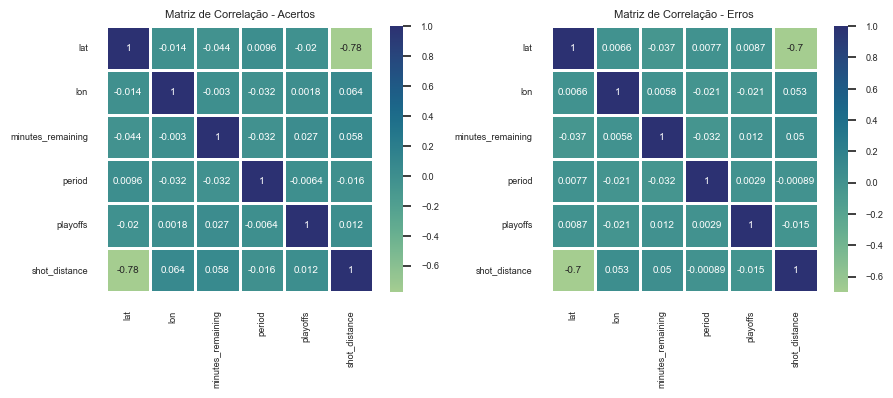

In [105]:
bdCertos = bd_filtrado2[bd_filtrado2["shot_made_flag"] == 1]
bdErros = bd_filtrado2[bd_filtrado2["shot_made_flag"] == 0]

bdCertos = bdCertos.drop('shot_made_flag', axis=1)
bdErros = bdErros.drop('shot_made_flag', axis=1)

fig, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_title('Matriz de Correlação - Acertos', fontsize=8)
sns.heatmap(bdCertos.corr(), annot=True, linewidths=1, cmap='crest', ax=axes[0])
sns.set(font_scale=0.6)
axes[1].set_title('Matriz de Correlação - Erros', fontsize=8)
sns.heatmap(bdErros.corr(), annot=True, linewidths=1, cmap='crest', ax=axes[1])
sns.set(font_scale=0.6)
fig.tight_layout()
fig.show()

In [106]:
#Carrega os dados de treino e teste
bd_train = pd.read_parquet('../Data/Processed/base_train.parquet')
bd_test = pd.read_parquet('../Data/Processed/base_test.parquet')

In [107]:
#Quantifica os dados de treino
bd_train.shape


(16228, 7)

In [108]:
#Quantifica os dados de teste
bd_test.shape


(4057, 7)

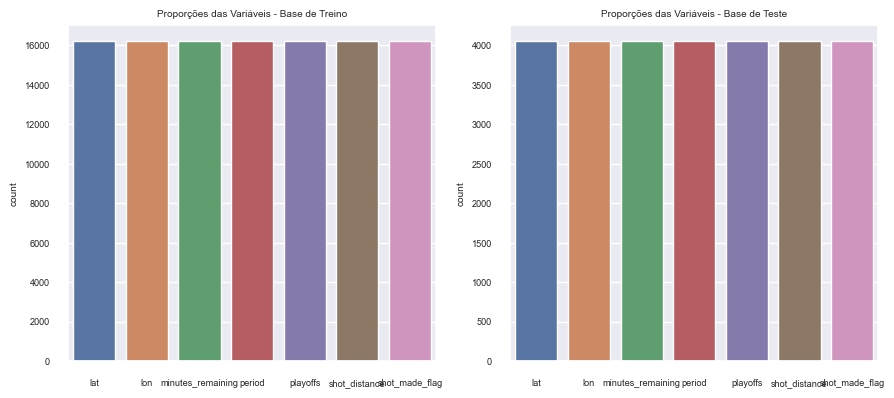

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(9,4))
sns.countplot(data=bd_train, ax=axes[0]);
axes[0].set_title('Proporções das Variáveis - Base de Treino')
sns.countplot(data=bd_test, ax=axes[1]);
axes[1].set_title('Proporções das Variáveis - Base de Teste')
fig.tight_layout()
fig.show()

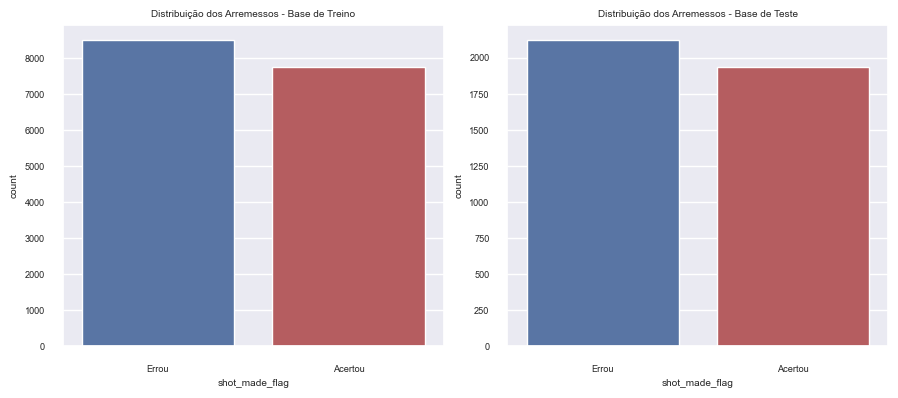

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(9,4))

sns.countplot(x='shot_made_flag', data=bd_train, ax=axes[0], palette=['b','r']);
axes[0].set_xticks(ticks=[0, 1], labels=['Errou', 'Acertou'])
axes[0].set_title('Distribuição dos Arremessos - Base de Treino')

sns.countplot(x='shot_made_flag', data=bd_test, ax=axes[1], palette=['b','r']);
axes[1].set_xticks(ticks=[0, 1], labels=['Errou', 'Acertou'])
axes[1].set_title('Distribuição dos Arremessos - Base de Teste')

fig.tight_layout()
fig.show()

In [111]:
#Usando pycaret
setup(data=bd_train, target='shot_made_flag')

,Description,Value
0,Session id,3334
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [126]:
lr_model = create_model('lr')
#Faz a predição do modelo
lr_predicao = predict_model(lr_model, data=bd_test)
plot_model(lr_model, plot = 'vc', save =True)
plot_model(lr_model, plot = 'learning', save =True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5660,0.5805,0.4659,0.5548,0.5065,0.1244,0.1260
1,0.5951,0.6048,0.4715,0.5967,0.5267,0.1813,0.1852
2,0.5704,0.5909,0.4760,0.5584,0.5139,0.1334,0.1348
3,0.5581,0.5812,0.4705,0.5426,0.5040,0.1092,0.1101
4,0.5863,0.6039,0.5000,0.5766,0.5356,0.1659,0.1673
5,0.5995,0.6194,0.5295,0.5893,0.5578,0.1937,0.1946
6,0.5731,0.5919,0.4391,0.5680,0.4953,0.1357,0.1391
7,0.5810,0.5966,0.4760,0.5733,0.5202,0.1539,0.1560
8,0.5493,0.5624,0.4926,0.5298,0.5105,0.0939,0.0941


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5770,0.5991,0.4951,0.5651,0.5278,0.1478,0.1488


'Learning Curve.png'

In [113]:
plot_model(lr_model, plot = 'confusion_matrix', save =True)

'Confusion Matrix.png'

In [114]:
import shutil
shutil.move('../Code/Learning Curve.png', '../Docs/LR_Learning_Curve.png')
shutil.move('../Code/Validation Curve.png', '../Docs/LR_Validation_Curve.png')
shutil.move('../Code/Confusion Matrix.png', '../Docs/LR_Confusion_Matrix.png')

'../Docs/LR_Confusion_Matrix.png'

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

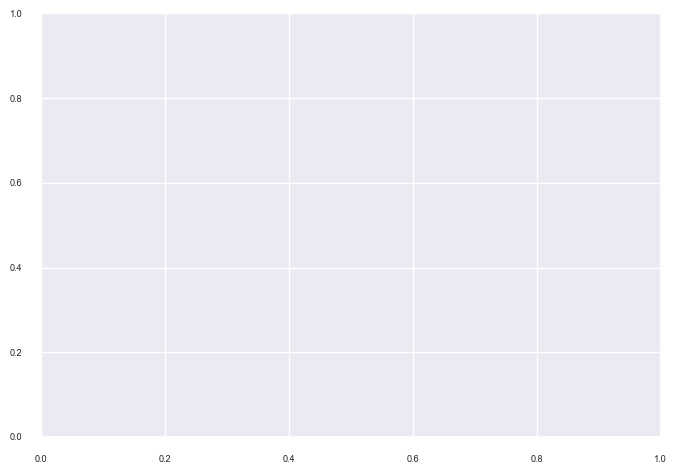

In [115]:
evaluate_model(lr_model)

In [116]:
dt_model = create_model('dt')
#Faz a predição do modelo
dt_predicao = predict_model(dt_model, data=bd_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5150,0.5044,0.5064,0.4928,0.4995,0.0292,0.0292
1,0.5317,0.5109,0.5488,0.5094,0.5284,0.0646,0.0648
2,0.5290,0.5193,0.5517,0.5059,0.5278,0.0598,0.0601
3,0.5308,0.5064,0.5646,0.5075,0.5345,0.0643,0.0646
4,0.5414,0.5196,0.5609,0.5179,0.5385,0.0841,0.0844
5,0.5405,0.5188,0.5830,0.5163,0.5477,0.0842,0.0849
6,0.5229,0.5062,0.5554,0.5000,0.5262,0.0484,0.0487
7,0.5308,0.5073,0.5572,0.5076,0.5312,0.0637,0.0639
8,0.5387,0.5313,0.5904,0.5145,0.5498,0.0815,0.0823


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5359,0.5184,0.5694,0.5125,0.5395,0.0743,0.0747


In [117]:
plot_model(dt_model, plot = 'vc', save =True)
plot_model(dt_model, plot = 'learning', save =True)
plot_model(dt_model, plot = 'confusion_matrix', save =True)
shutil.move('../Code/Learning Curve.png', '../Docs/DT_Learning_Curve.png')
shutil.move('../Code/Validation Curve.png', '../Docs/DT_Validation_Curve.png')
shutil.move('../Code/Confusion Matrix.png', '../Docs/DT_Confusion_Matrix.png')

'../Docs/DT_Confusion_Matrix.png'

In [118]:
evaluate_model(dt_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [137]:
#Pesquisando o melhor modelo
#best_model = compare_models()
best_model = compare_models(include=['lr', 'dt'])
print(best_model)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3334, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [131]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

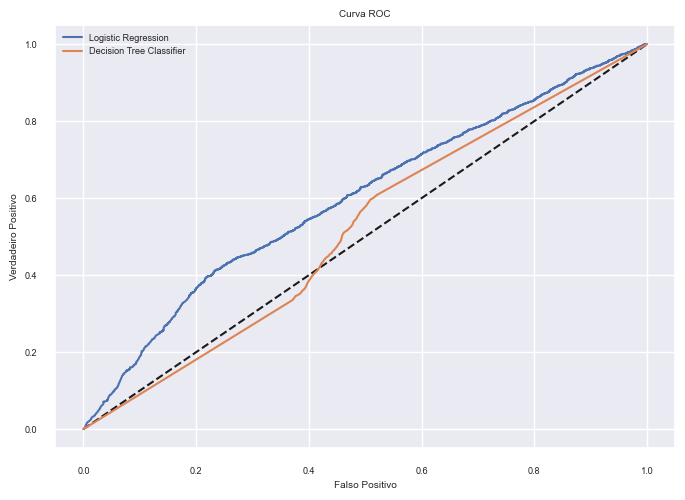

In [128]:
#Monta a curva ROC
X_test = bd_test.drop('shot_made_flag', axis=1)
Y_test = bd_test['shot_made_flag']

y_pred_prob1 = lr_model.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)

y_pred_prob2 = dt_model.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)

y_pred_prob3 = best_model.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree Classifier")
#plt.plot(fpr3, tpr3, label= "Ada Boost Classifier") #Adicionado a parte no projeto
plt.legend()
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title('Curva ROC')
plt.show()